# Kurtosis - 4, Skewness -3

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
import risk_kt as rk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
rets = rk.get_ffme_returns()

In [14]:
hfi = rk.get_hfi_returns()

In [17]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [23]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis ="columns")

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [29]:
rk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [34]:
import scipy.stats

In [41]:
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [42]:
import numpy as np

In [168]:
normal_rets = np.random.normal(0,1 ,size = [100000,1])

In [170]:
rk.kurtosis(normal_rets)

2.9983533578440178

In [167]:
scipy.stats.kurtosis(normal_rets)

array([-0.00590057])

In [163]:
a = plt.hist(normal_rets)

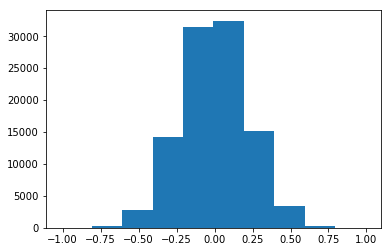

In [164]:
plt.show(a)

In [117]:
rk.kurtosis(normal_rets)

3.0197131879536778

In [121]:
rk.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [119]:
scipy.stats.kurtosis(normal_rets)

array([ 0.01971319])

In [120]:
scipy.stats.kurtosis(hfi)

array([ 20.28083446,  -0.04703963,   4.88998336,   6.25078841,
        14.21855526,   5.03582817,  26.84219928,   2.74167945,
         1.52389258,   5.73894979,   9.12120787,   3.11777175,   4.07015278])

In [124]:
scipy.stats.jarque_bera(normal_rets)

(1.4468654964302885, 0.48508422262930206)

In [125]:
rk.is_normal(normal_rets)

True

In [146]:
for cols in hfi.columns:
    print(cols, rk.is_normal(hfi[cols], level = 0.4))
    
    
# Alternate to above loop, aggregate methods
hfi.apply(func = rk.is_normal, args = (0.4,), axis=0)


Convertible Arbitrage False
CTA Global True
Distressed Securities False
Emerging Markets False
Equity Market Neutral False
Event Driven False
Fixed Income Arbitrage False
Global Macro False
Long/Short Equity False
Merger Arbitrage False
Relative Value False
Short Selling False
Funds Of Funds False


Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [ ]:
scipy.stats.jarque_bera(normal_rets)

In [211]:
plt.close("all")
figure = dict()
for col in hfi.columns:
    figure[col] = plt.figure()
    plt.hist(hfi[cols], figure = figure[col])

In [225]:
%matplotlib inline
figure[i].show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [223]:
i

'Funds Of Funds'